In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
dirs = [d for d in os.listdir() if os.path.isdir(d)]
dirs

['old_percent_075_lw07_DP',
 'old_percent_075_lw09_DP',
 'old_percent_075_lw03_DP',
 'old_percent_075_lw05_DP',
 'old_percent_075_lw0001_DP',
 'old_percent_075_lw001_DP',
 'old_percent_075_lw01_DP',
 'old_percent_075_lw0005_DP']

In [3]:
# load all .csv files in dirs as dataframes and concatenate them
dfs = []
for d in dirs:
    seeds = [f for f in os.listdir(os.path.join('./',d)) if f.startswith('seed')]
    for seed in seeds:
        results = [f for f in os.listdir(os.path.join(d,seed)) if f.startswith('test_results')][0]
        results_df = pd.read_csv(os.path.join(d, seed, results))
        dfs.append(results_df)
df = pd.concat(dfs)


In [4]:
df = df[["test/lungOpacity_young_subgroupAUROC","test/lungOpacity_old_subgroupAUROC","job_type_mod"]]
# compute mean over job_type_mod
df_mean = df.groupby(['job_type_mod']).mean()
df_mean

,test/lungOpacity_young_subgroupAUROC,test/lungOpacity_old_subgroupAUROC
job_type_mod,,
lw0001,0.6098,0.6916
lw0005,0.6200,0.7462
lw001,0.6210,0.7818
lw01,0.6112,0.8052
lw03,0.6112,0.8052
lw05,0.6116,0.8054
lw07,0.6112,0.8052
lw09,0.6112,0.8052


In [5]:
# melt columns to rows
df_mean = pd.melt(df_mean.reset_index(), id_vars=['job_type_mod'], value_vars=['test/lungOpacity_young_subgroupAUROC','test/lungOpacity_old_subgroupAUROC'])

df_mean

,job_type_mod,variable,value
0,lw0001,test/lungOpacity_young_subgroupAUROC,0.6098
1,lw0005,test/lungOpacity_young_subgroupAUROC,0.6200
2,lw001,test/lungOpacity_young_subgroupAUROC,0.6210
3,lw01,test/lungOpacity_young_subgroupAUROC,0.6112
4,lw03,test/lungOpacity_young_subgroupAUROC,0.6112
5,lw05,test/lungOpacity_young_subgroupAUROC,0.6116
6,lw07,test/lungOpacity_young_subgroupAUROC,0.6112
7,lw09,test/lungOpacity_young_subgroupAUROC,0.6112
8,lw0001,test/lungOpacity_old_subgroupAUROC,0.6916
9,lw0005,test/lungOpacity_old_subgroupAUROC,0.7462


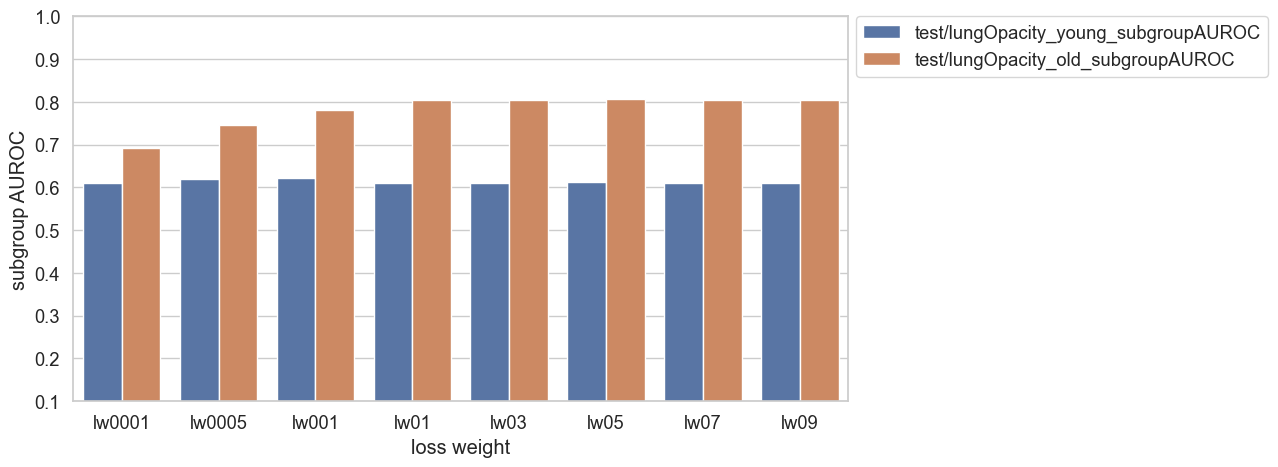

In [6]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.2, style="whitegrid")
g = sns.barplot(x='job_type_mod', y='value', hue='variable', data=df_mean)
# set y axis limit
g.set(ylim=(0.1, 1))
g.set(xlabel='loss weight')
g.set(ylabel='subgroup AUROC')
# put legend outside of plot
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)